In [38]:
import pandas as pd
import numpy as np
import os
from IPython.display import Image

### 1. Badanie rezystancji uzwojeń transformatora.

Konwersja danych z miernika analogowego:

In [14]:
conversion = lambda zakres, max_l_dz, wskazanie: (zakres/max_l_dz) * wskazanie
conversion(300,300,120)

120.0

In [14]:
l = [2.050,2,1.025,6.172,2,1.025]
n_pomiar = 1
data = [l] * n_pomiar


df1 = pd.DataFrame(data,index=pd.Index([f'Pomiar {i+1}' for i in range(n_pomiar)], 
                                      name='Wyniki pomiarów:'),
                  columns=pd.MultiIndex.from_product([['Uzwojenie gorne', 'Uzwojenie dolne'], 
                                                      ['U[V]', 'I[A]', 'R[ohm]']]))
df1 = df1.style.set_caption('Tabela 1. Wyniki pomiarów dokonanych podczas badania rezystancji uzwojenia transformatora.')


df1

Wartość średnia rezystancji $R_{1,śr} = 1.025[\Omega]$



### 2. Badanie przekładni napięciowej i prądowej transformatora.

In [34]:
l = [0,0,0] # test samples
n_samples = 4
data = [l] * n_samples

gear = lambda sr1, sr2: sr1/sr2 # calc for U sr1/sr2 , for I sr2/sr1

df2 = pd.DataFrame(data, index=pd.Index([f'U_{i+1}[V]' if i < 2 else f'I_{i-1}[A]' for i in range(n_samples)], 
                                      name='Wyniki pomiarów:'),
                  columns=["Pomiar1", "Uśr[V]", "przekładnia[V][A]"])

df2.iloc[0,0] = 230
df2.iloc[1,0] = 135
df2.iloc[2,0] = 2.5
df2.iloc[3,0] = 4
df2.iloc[0,1] = df2.iloc[0,0]
df2.iloc[1,1] = df2.iloc[1,0]
df2.iloc[2,1] = df2.iloc[2,0]
df2.iloc[3,1] = df2.iloc[3,0] 
df2.iloc[0,2] = gear(df2.iloc[0,0], df2.iloc[1,0])
df2.iloc[1,2] = gear(df2.iloc[0,0], df2.iloc[1,0])
df2.iloc[2,2] = gear(df2.iloc[3,0], df2.iloc[2,0])
df2.iloc[3,2] = gear(df2.iloc[3,0], df2.iloc[2,0])
df2 = df2.style.set_caption('Tabela 2. Wyniki pomiarów przekładni napięciowej i prądowej transformatora.')
df2




,Pomiar1,Uśr[V],przekładnia[V][A]
Wyniki pomiarów:,,,
U_1[V],230.000000,230.000000,1.703704
U_2[V],135.000000,135.000000,1.703704
I_1[A],2.500000,2.500000,1.600000
I_2[A],4.000000,4.000000,1.600000


### 3. Badanie stanu jałowego.

Dla obliczenia poniższych wielkości potrzebujemy skorzystać z poniższych wzorów:<p>
### $cos\phi_{0}=\frac {P_{0}}{U_{0} * I_{0}}$
### $I_{cz}=I_{0}*cos\phi_{0}$
### $I_{\mu}=I_{0}*sin\phi_{0}$  

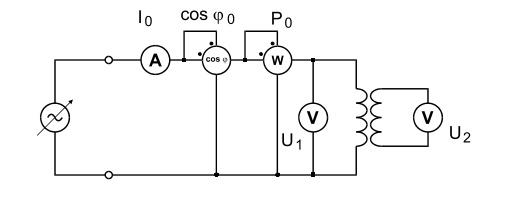

In [40]:
path = "./jalowy.png"
Image(path)

In [10]:
l = [1,2,3,0,0,0]
data = [[230, 0.168, 7.6],
                [211, 0.121, 6.4],
                [220, 0.14, 6.9],
                [199, 0.1, 5.6],
                [190, 0.089, 5.2],
                [180, 0.077, 4.7],
                [170, 0.068, 4.3],
                [159, 0.06, 3.8],
                [150, 0.054, 3.4],
                [140, 0.041, 3.1],]

n_samples = len(data)

cos_fi_0 = lambda p_0, u_0, i_0: p_0 / (u_0 * i_0)

i_m = lambda i_0, cos_fi_0: i_0 * np.cos(cos_fi_0)

i_cz = lambda i_0, cos_fi_0: i_0 * cos_fi_0


df3 = pd.DataFrame(data, columns=["U_0[V]", "I_0[A]", "P_0[W]"],
                  index=np.arange(n_samples)+1)

df3["cos fi_0"] = cos_fi_0(df3["P_0[W]"], df3["U_0[V]"], df3["I_0[A]"])

df3["Im[A]"] = i_m(df3["I_0[A]"], df3["cos fi_0"])

df3["Icz[A]"] = i_cz(df3["I_0[A]"], df3["cos fi_0"])
df3 = df3.style.set_caption("Tabela 3. Wyniki pomiarów charakterystyk stanu jałowego")
df3


,U_0[V],I_0[A],P_0[W],cos fi_0,Im[A],Icz[A]
1,230,0.168000,7.600000,0.196687,0.164761,0.033043
2,211,0.121000,6.400000,0.250676,0.117218,0.030332
3,220,0.140000,6.900000,0.224026,0.136502,0.031364
4,199,0.100000,5.600000,0.281407,0.096067,0.028141
5,190,0.089000,5.200000,0.307510,0.084825,0.027368
6,180,0.077000,4.700000,0.339105,0.072615,0.026111
7,170,0.068000,4.300000,0.371972,0.063350,0.025294
8,159,0.060000,3.800000,0.398323,0.055303,0.023899
9,150,0.054000,3.400000,0.419753,0.049312,0.022667
10,140,0.041000,3.100000,0.540070,0.035165,0.022143


### 4. Badanie stanu obciążenia

Dla obliczenia poniższych wielkości potrzebujemy skorzystać z poniższych wzorów:<p>
### $P_{2}=U_{2} * I_{2}$
### $cos\phi_{1}=\frac {P_{1}}{U_{1} * I_{1}}$
### $\eta=\frac {P_{2}}{P_{1}} * 100\%$  

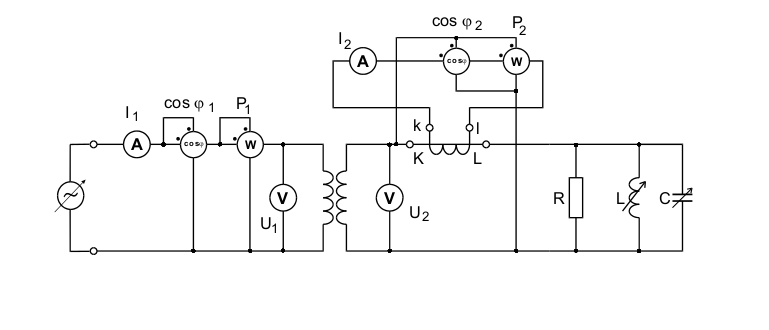

In [41]:
path = "./obciazenie.png"
Image(path)

In [22]:
data = [[210, 2.03, 419, 120, 3.5],
                [209, 1.736, 357, 120, 3],
                [210, 1.451, 300, 120, 2.5],
                [210, 1.169, 242.3, 120, 2],
                [210.7, 0.9, 186.2, 130, 1.5]]

n_samples = len(data)
helper_col = ["P_2[W]", "cos_fi_1", "n[%]", "I_2/I_1[-]"]
df4 = pd.DataFrame(data, columns=["U_1[V]", "I_1[A]", "P_1[W]", "U_2[V]", "I_2[A]"], index=np.arange(n_samples)+1)

p_2 = lambda u_2, i_2: u_2 * i_2

cos_fi_1 = lambda p_1, u_1, i_1: p_1/(u_1 * i_1)

n = lambda p_2, p_1: (p_2/p_1) * 100

df4["P_2[W]"] = p_2(df4["U_2[V]"], df4["I_2[A]"])

df4["cos_fi_1"] = cos_fi_1(df4["P_1[W]"], df4["U_1[V]"], df4["I_1[A]"])

df4["n[%]"] = n(df4["P_2[W]"], df4["P_1[W]"])

df4["I_2/I_1[-]"] = df4["I_2[A]"]/df4["I_1[A]"]

df4=df4.style.set_caption("Tabela 4. Wyniki pomiaru stanu obciążenia transformatora")


df4


,U_1[V],I_1[A],P_1[W],U_2[V],I_2[A],P_2[W],cos_fi_1,n[%],I_2/I_1[-]
1,210.000000,2.030000,419.000000,120,3.500000,420.000000,0.982876,100.238663,1.724138
2,209.000000,1.736000,357.000000,120,3.000000,360.000000,0.983948,100.840336,1.728111
3,210.000000,1.451000,300.000000,120,2.500000,300.000000,0.984543,100.000000,1.722950
4,210.000000,1.169000,242.300000,120,2.000000,240.000000,0.987006,99.050764,1.710864
5,210.700000,0.900000,186.200000,130,1.500000,195.000000,0.981912,104.726101,1.666667


### 5. Badanie stanu zwarcia.

Dla obliczenia poniższych wielkości potrzebujemy skorzystać z poniższych wzorów:<p>
### $cos\phi_{z}=\frac {P_{z}}{U_{z} * I_{z}},$
### $R_{z}= \frac {P_{z}}{I_{z}^2},$
### $X_{z}= \sqrt{Z_{z}^2 - R_{z}^2},$
### $Z_{z}=\frac {U_{z}}{I_{z}},$
### $P_{2}=R_{2,śr}*I_{2}^2$
    

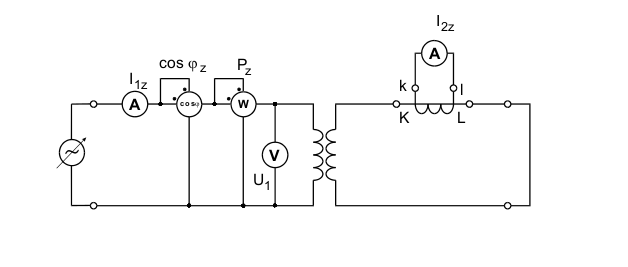

In [42]:
path = "./zwarcie.png"
Image(path)

In [34]:
l = list(range(1,10)) # test data

data = [[40, 2.9, 54.7],
               [35.5, 2.57, 43.1],
               [31.4, 2.27, 33.9],
               [27.7, 2.01, 26.3],
               [24.7, 1.717, 19.3],
               [19.6, 1.42, 13.3],
               [15.5, 1.117, 8.2],
               [11.6, 0.837, 4.6],
               [7.5, 0.5, 1.9]]


n_samples = len(data)

helper_cols=["cos_fi_z", "R_z[ohm]", "X_z[ohm]", "Z_z[ohm]", "I_2[A]", "P_2[W]"]

i_2_measurments = np.linspace(5, 1, 9)
                              
cos_fi_z = lambda p_z, u_z, i_z: p_z/(u_z * i_z)

r_z = lambda p_z, i_z: p_z / (i_z**2)

z_z = lambda u_z, i_z: u_z/i_z

x_z = lambda z_z, r_z: (z_z**2 - r_z**2)**.5

p_2 = lambda r_2_sr, i_2: r_2_sr * i_2**2 

columns = ["U_z[V]", "I_z[A]", "P_z[W]"]
df5 = pd.DataFrame(data, columns=columns, index=np.arange(n_samples)+1)

df5["cos_fi_z"] = cos_fi_z(df5["P_z[W]"], df5["U_z[V]"], df5["I_z[A]"])

df5["R_z[ohm]"] = r_z(df5["P_z[W]"], df5["I_z[A]"])

df5["Z_z[ohm]"] = z_z(df5["U_z[V]"], df5["I_z[A]"])

df5["X_z[ohm]"] = x_z(df5["Z_z[ohm]"], df5["R_z[ohm]"])

df5["I_2[A]"] = i_2_measurments

df5["P_2[W]"] = np.mean(df5["R_z[ohm]"]) * df5["I_2[A]"]

df5=df5.style.set_caption("Tabela 5. Tabela wyników pomiarów stanu zwarcia normalnego")
df5


,U_z[V],I_z[A],P_z[W],cos_fi_z,R_z[ohm],Z_z[ohm],X_z[ohm],I_2[A],P_2[W]
1,40.000000,2.900000,54.700000,0.471552,6.504162,13.793103,12.163288,5.000000,33.332749
2,35.500000,2.570000,43.100000,0.472406,6.525458,13.813230,12.174716,4.500000,29.999474
3,31.400000,2.270000,33.900000,0.475603,6.578820,13.832599,12.167988,4.000000,26.666199
4,27.700000,2.010000,26.300000,0.472367,6.509740,13.781095,12.146681,3.500000,23.332925
5,24.700000,1.717000,19.300000,0.455082,6.546614,14.385556,12.809609,3.000000,19.999650
6,19.600000,1.420000,13.300000,0.477867,6.595914,13.802817,12.124837,2.500000,16.666375
7,15.500000,1.117000,8.200000,0.473619,6.572151,13.876455,12.221409,2.000000,13.333100
8,11.600000,0.837000,4.600000,0.473777,6.566091,13.859020,12.204872,1.500000,9.999825
9,7.500000,0.500000,1.900000,0.506667,7.600000,15.000000,12.932131,1.000000,6.666550


# TO DO
   
    b) Wykresy wykonać na PAPIERZE MILIMETROWYM!
    c) Wyznaczyć charakterystyki stanu jałowego, tj. 
    d) Wyznaczyć charakterystyki stanu obciążenia, tj. 
    e) Wyznaczyć charakterystyki zwarciowe, tj. , 
    f) Przeprowadzić dyskusję wyników oraz podać wnioski wg wytycznych